In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk,  erosion, dilation
from skimage.morphology import opening, closing, white_tophat
from skimage.util import invert

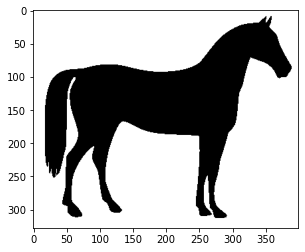

In [5]:
im1=data.horse()
plt.imshow(im1,cmap='gray')

In [6]:
image = invert(data.horse())

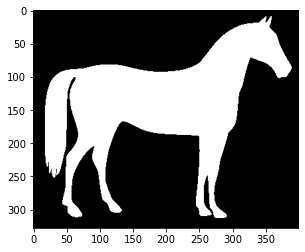

In [7]:
plt.imshow(image,cmap='gray')

In [8]:
selem = disk(6)
eroded = erosion(image, selem)

In [9]:
def myDisplay(x,y):
    plt.subplot(1,2,1),plt.imshow(x)
    plt.subplot(1,2,2),plt.imshow(y)

In [10]:
def myDisplayCmap(x,y):
    plt.subplot(1,2,1),plt.imshow(x,cmap='gray')
    plt.subplot(1,2,2),plt.imshow(y,cmap='gray')

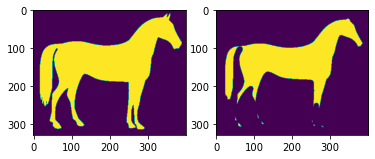

In [11]:
myDisplay(image,eroded)

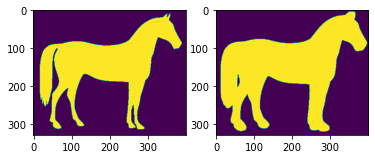

In [12]:
selem = disk(6)
dilated = dilation(image, selem)
myDisplay(image,dilated)

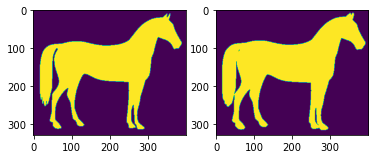

In [13]:
selem = disk(2)
dilated = dilation(image, selem)
myDisplay(image,dilated)

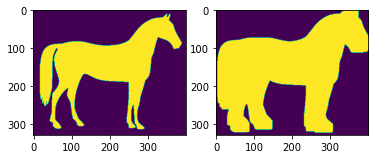

In [28]:
from skimage.morphology import rectangle

selem = rectangle(20,30)
dilated = dilation(image, selem)
myDisplay(image,dilated)

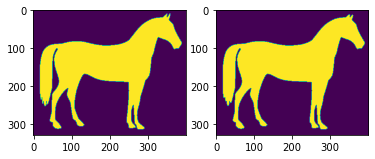

In [29]:
selem = disk(2)
opening_img = opening(image, selem)
myDisplay(image,opening_img)

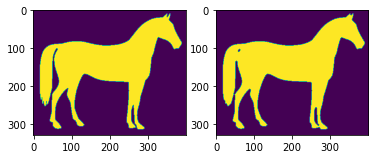

In [30]:
closing_img = closing(image, selem)
myDisplay(image,closing_img)

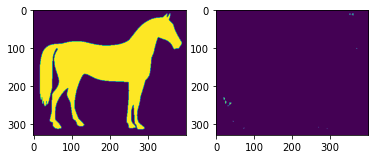

In [31]:
white_tophat_img = white_tophat(image, selem)
myDisplay(image,white_tophat_img)
# The white top hat of an image is defined as the image minus its morphological opening.
# This operation returns the bright spots of the image that are smaller than the structuring element.

In [32]:
# from skimage.morphology import reconstruction

In [24]:
# # skimage.morphology.reconstruction(seed, mask, method='dilation', selem=None, offset=None)

# reconstruction_img = reconstruction(image, selem)
# myDisplay(image,reconstruction_img)

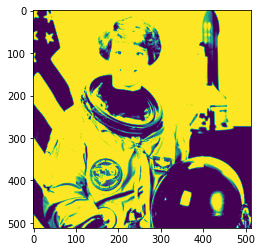

In [33]:
import skimage
from skimage import data, exposure, img_as_float
from skimage.morphology import reconstruction
import matplotlib.pyplot as plt
fn='ch_02/images/image.jpg'

img = skimage.io.imread(fn)
gray_img = 255*skimage.color.rgb2gray(img) # multiply by 255 to get back in the [0;255] range
img_inten = exposure.rescale_intensity(gray_img,in_range=(50,100))
# print(img_inten)
plt.imshow(img_inten)



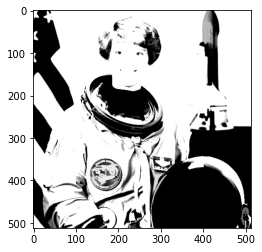

In [34]:
diliation_seed = img_inten.copy()
diliation_seed[1:-1,1:-1] = img_inten.min()
mask = img_inten

eroded_img = reconstruction(diliation_seed,mask,method='dilation')
plt.imshow(eroded_img,cmap='gray')
plt.show()

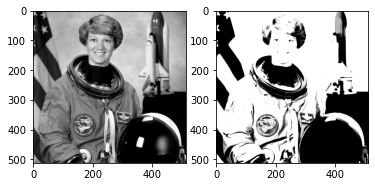

In [35]:
myDisplayCmap(gray_img,eroded_img)